# Orchestrator Notebook
### Training Responsibilities:
 - 1.1) Partition Training Data | Read data from EDA notebook, partition into grinding and polishing trials (pandas DataFrames)
 - 1.2) Pickle the Training Data | Write the project home directory (this can then be used by the models)
 - 1.3) Read & Organize Data from Models | Once models are run, they individually write output data to their own directory. This notebook reads these files for analysis.
### Analysis Responsibilities:
 - 2.1) The following TYPES of plots are created
 - 2.2) They are organized into the following directory structure:



### For questions, contact Sean Jackson at:
 - jackson129@llnl.gov (LLNL Email, expires August , 2025)
 - sjackson6325@gmail.com (Personal Email)
 - seank.jackson@mail.utoronto.ca (School Email)
 - 201-937-9681 (Cell)

## Obtain the Project Directory

In [1]:
from pathlib import Path
notebook_dir = Path.cwd()
parent_dir = notebook_dir.parent
print(parent_dir)

c:\Users\jackson129\OneDrive - LLNL\APEX_Cornell_Analysis


## Section 1 - Create Training Dataframes

In [2]:
""" ======== GRINDING DATA ======== """


import pickle
import pandas as pd
from partition_tree import*
from pathlib import Path
import os

# ==== READ IN DATA, DO MINOR ENHANCEMENTS === #
# Print current working directory for debugging
print("Current working directory:", os.getcwd())
# Build the path to the data file in the parent directory
data_path_grinding = parent_dir / 'orchestrator/training_vars_grinding.pkl'
# Load the data (results from EDA notebook)
with open(data_path_grinding, 'rb') as f:
    data = pickle.load(f)
df = data['training_df']
df = df[df['grit_step'] != 0] # Remove the initial grinding trial (useless)
df['image_id'] = df['image_id'] - 1 # Convert Image ID to Image Index for Analysis


# ==== SPLIT BY GRIT === #
# Create a new binary partition tree (custom class I made)
# Divide the data by grit step
tree = PartitionTree(df, grit_col='grit_step', initial_split=1.0, min_rows=5)
tree.print_tree()
# Sort each node (Dataframe) in the tree by image_id
nodes = tree.get_all_nodes()
for node in nodes:
    node.df = node.df.sort_values(by='image_id')
# Result: a tree of Dataframes partitioned by grit

batch_pickle_path = Path().resolve() / 'train_batch_df.pkl'
os.environ['BATCH_PICKLE_PATH'] = str(batch_pickle_path)

# For grinding
df = pd.concat(
    [tree.find_node_by_interval((15.0, 26.0)).df,
     tree.find_node_by_interval((26.0, 35.0)).df,
     tree.find_node_by_interval((35.0, 125.0)).df], axis=0).sort_values(by='image_id')

display(df)

df.to_pickle('train_batch_grinding_df.pkl')


num_positives = (df['label'] == 1).sum()
num_negatives = (df['label'] == 0).sum()
num_total = num_positives + num_negatives
p_positives = 100 * (num_positives / num_total)
p_negatives = 100 * (num_negatives / num_total)

print(f"Number of Samples: {num_total} | {p_positives:.2f}% Good | {p_negatives:.2f}% Bad")

DF_GRINDING = df.copy()
print("Unique grit values in DF_GRINDING:", sorted(DF_GRINDING['grit_step'].unique()))

Current working directory: c:\Users\jackson129\OneDrive - LLNL\APEX_Cornell_Analysis\orchestrator
Depth 0: Interval [0.08, 125.0), Split at 1.0, Rows: 567
    Depth 1: Interval [0.08, 1.0), Split at None, Rows: 84
        Depth 2: Interval [0.08, 0.3) [Leaf], Rows: 42
        Depth 2: Interval [0.3, 1.0) [Leaf], Rows: 42
    Depth 1: Interval [1.0, 125.0), Split at None, Rows: 483
        Depth 2: Interval [1.0, 35.0), Split at None, Rows: 231
            Depth 3: Interval [1.0, 15.0) [Leaf], Rows: 105
            Depth 3: Interval [15.0, 35.0), Split at None, Rows: 126
                Depth 4: Interval [15.0, 26.0) [Leaf], Rows: 63
                Depth 4: Interval [26.0, 35.0) [Leaf], Rows: 63
        Depth 2: Interval [35.0, 125.0), Split at None, Rows: 252
            Depth 3: Interval [35.0, 58.0) [Leaf], Rows: 42
            Depth 3: Interval [58.0, 125.0), Split at None, Rows: 210
                Depth 4: Interval [58.0, 125.0) [Leaf], Rows: 42
                Depth 4: Interval 

C:\Users\jackson129\AppData\Local\Temp\ipykernel_10308\1284514039.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_id'] = df['image_id'] - 1 # Convert Image ID to Image Index for Analysis


image_id  label  grit_time  grit_step  \
1          21      0         30      125.0   
29         22      0         30      125.0   
57         23      0         30      125.0   
85         24      0         30      125.0   
113        25      0         30      125.0   
..        ...    ...        ...        ...   
466       394      1          6       15.0   
494       395      1          6       15.0   
522       396      1          6       15.0   
550       397      1          6       15.0   
578       398      1          6       15.0   

                                                 image  
1    <PIL.PngImagePlugin.PngImageFile image mode=L ...  
29   <PIL.PngImagePlugin.PngImageFile image mode=L ...  
57   <PIL.PngImagePlugin.PngImageFile image mode=L ...  
85   <PIL.PngImagePlugin.PngImageFile image mode=L ...  
113  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
..                                                 ...  
466  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
494  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
522  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
550  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
578  <PIL.PngImagePlugin.PngImageFile image mode=L ...  

[378 rows x 5 columns]

Number of Samples: 378 | 47.35% Good | 52.65% Bad
Unique grit values in DF_GRINDING: [np.float64(15.0), np.float64(26.0), np.float64(35.0), np.float64(58.0), np.float64(125.0)]


In [3]:
""" ======== POLISHING DATA ======== """


import pickle
import pandas as pd
from partition_tree import*
from pathlib import Path
import os


# ==== READ IN DATA, DO MINOR ENHANCEMENTS === #
# Print current working directory for debugging
print("Current working directory:", os.getcwd())
# Build the path to the data file in the parent directory
data_path_polishing = parent_dir / 'orchestrator/training_vars_polishing.pkl'
# Load the data (results from EDA notebook)
with open(data_path_polishing, 'rb') as f:
    data = pickle.load(f)
df = data['training_df']
#df = df[df['grit_step'] != 0] # Remove the initial grinding trial (useless)
df['image_id'] = df['image_id'] - 1 # Convert Image ID to Image Index for Analysis


batch_pickle_path = Path().resolve() / 'train_batch_df.pkl'
os.environ['BATCH_PICKLE_PATH'] = str(batch_pickle_path)

# For polishing no tree is needed (in the EDA notebook,
# it's all the values with 200x magnification)
df = df.sort_values(by='image_id')
df.to_pickle('train_batch_polishing_df.pkl')


num_positives = (df['label'] == 1).sum()
num_negatives = (df['label'] == 0).sum()
num_total = num_positives + num_negatives
p_positives = 100 * (num_positives / num_total)
p_negatives = 100 * (num_negatives / num_total)

print(f"Number of Samples: {num_total} | {p_positives:.2f}% Good | {p_negatives:.2f}% Bad")

DF_POLISHING = df.copy()
print("Unique grit values in DF_POLISHING:", sorted(DF_POLISHING['grit_step'].unique()))

Current working directory: c:\Users\jackson129\OneDrive - LLNL\APEX_Cornell_Analysis\orchestrator
Number of Samples: 189 | 42.86% Good | 57.14% Bad
Unique grit values in DF_POLISHING: [np.float64(0.08), np.float64(0.3), np.float64(1.0)]


In [4]:
""" ======== GRIT DATA ======== """
# The grinding and polishing data should contain all valid data
# This code is to isolate a specific grit for training.

import pandas as pd

# Specify grit and output path
grit_value = 15.0  # <-- Set your target grit here!
output_pickle_path = "train_batch_grit_df.pkl"

# SEARCH IN GRINDING DATA
df_grit = DF_GRINDING[DF_GRINDING['grit_step'] == grit_value]

if not df_grit.empty:
    print(f"Grit {grit_value} found in grinding data.")
else:
    # SEARCH IN POLISHING DATA
    df_grit = DF_POLISHING[DF_POLISHING['grit_step'] == grit_value]
    if not df_grit.empty:
        print(f"Grit {grit_value} found in polishing data.")
    else:
        print(f"ERROR: Grit {grit_value} not found in either grinding or polishing data.")
        df_grit = None
        
# EXPORT TO PICKLE IF FOUND
if df_grit is not None and not df_grit.empty:
    df_grit.to_pickle(output_pickle_path)
    print(f"Data for grit {grit_value} exported to {output_pickle_path}")

display(df_grit)

Grit 15.0 found in grinding data.
Data for grit 15.0 exported to train_batch_grit_df.pkl


image_id  label  grit_time  grit_step  \
16        336      0          2       15.0   
44        337      0          2       15.0   
72        338      0          2       15.0   
100       339      1          2       15.0   
128       340      0          2       15.0   
..        ...    ...        ...        ...   
466       394      1          6       15.0   
494       395      1          6       15.0   
522       396      1          6       15.0   
550       397      1          6       15.0   
578       398      1          6       15.0   

                                                 image  
16   <PIL.PngImagePlugin.PngImageFile image mode=L ...  
44   <PIL.PngImagePlugin.PngImageFile image mode=L ...  
72   <PIL.PngImagePlugin.PngImageFile image mode=L ...  
100  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
128  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
..                                                 ...  
466  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
494  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
522  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
550  <PIL.PngImagePlugin.PngImageFile image mode=L ...  
578  <PIL.PngImagePlugin.PngImageFile image mode=L ...  

[63 rows x 5 columns]

## Generate Visuals to Show Augmentations Applied to Training Data

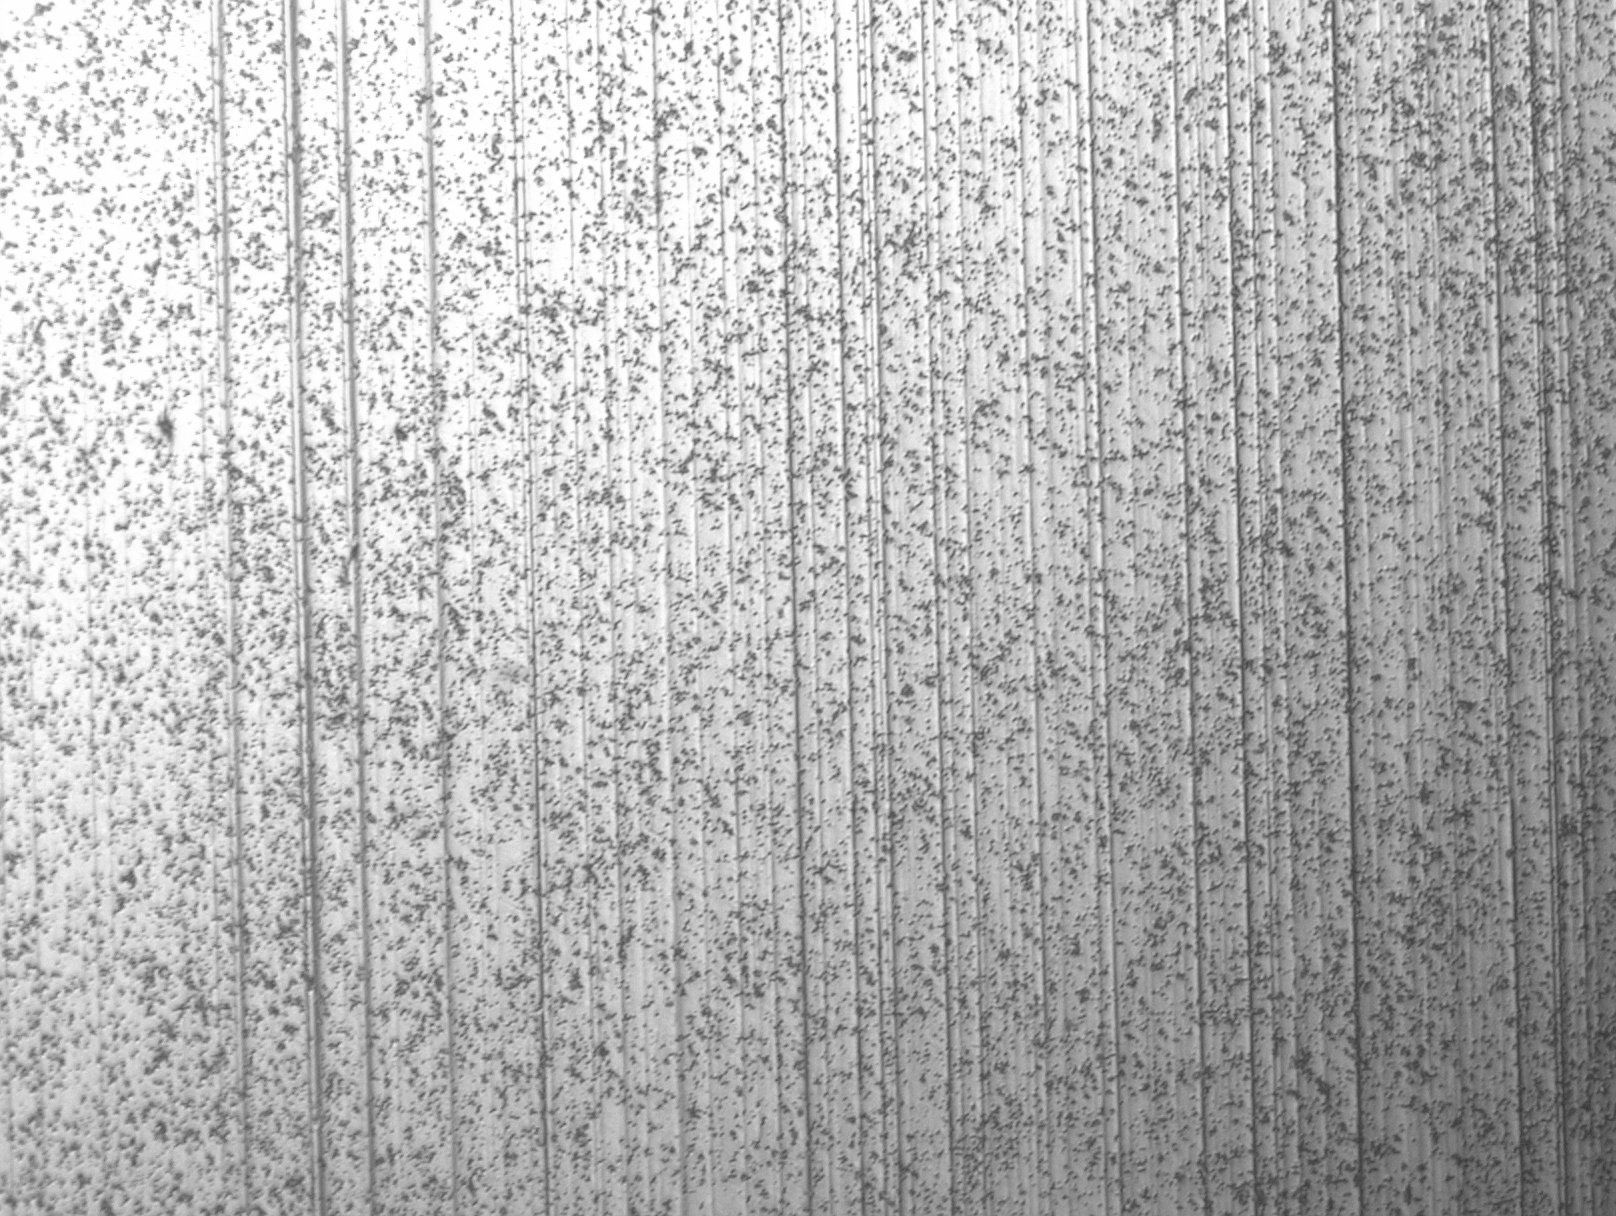

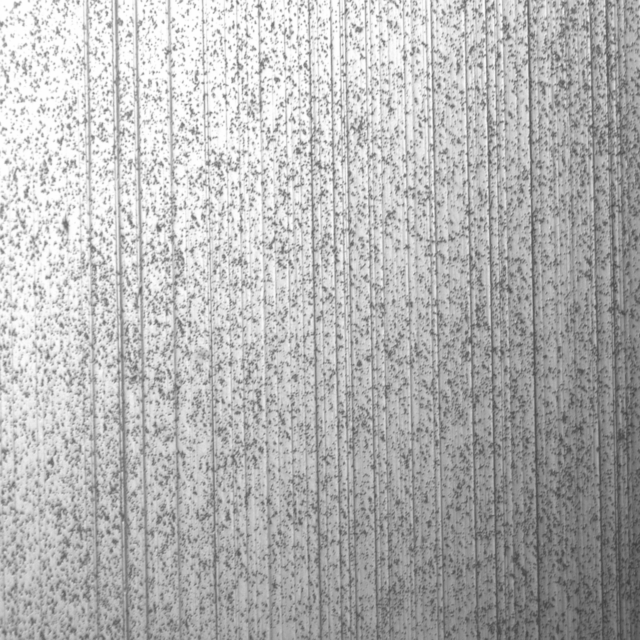

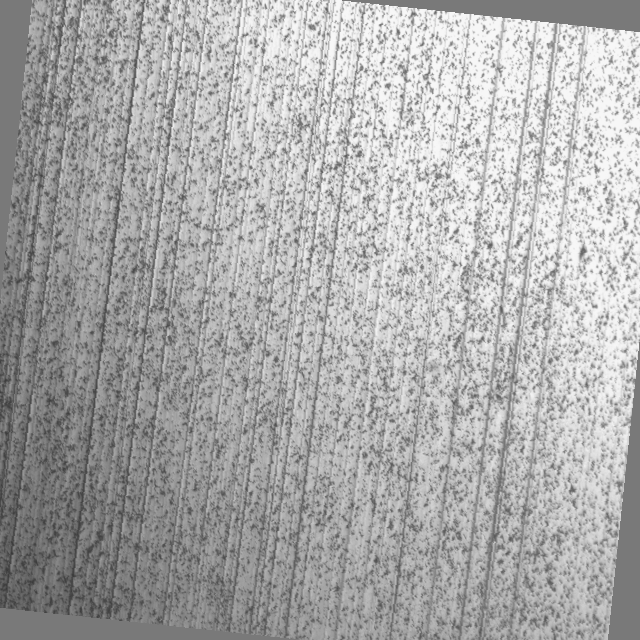

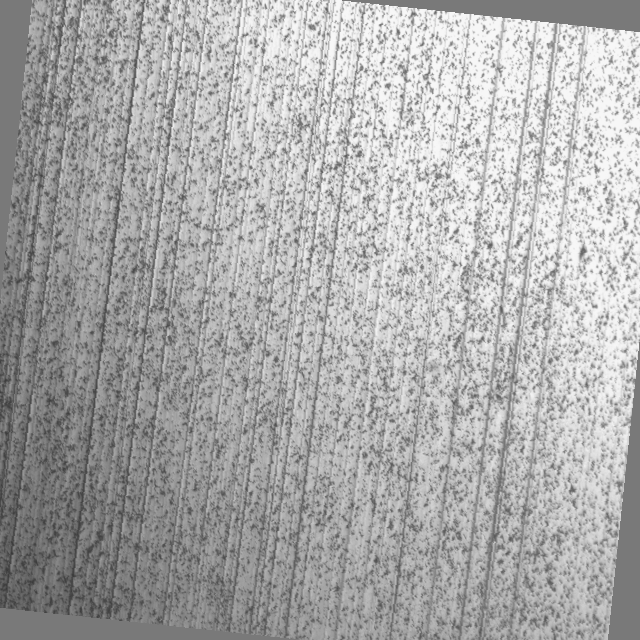

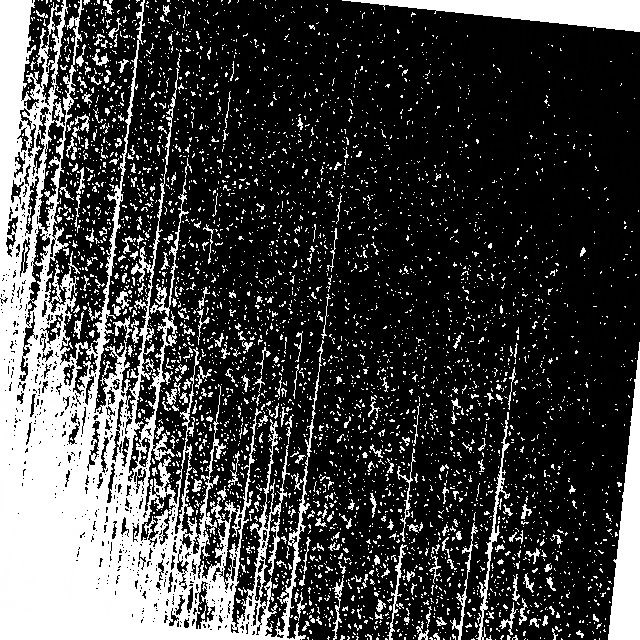

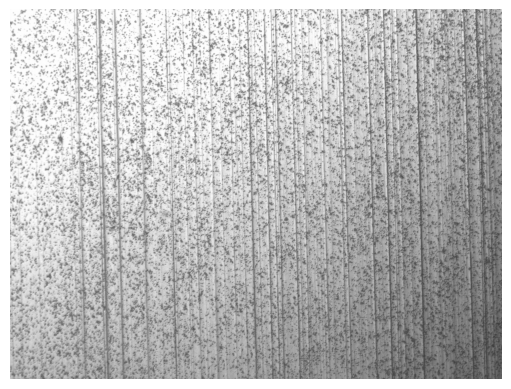

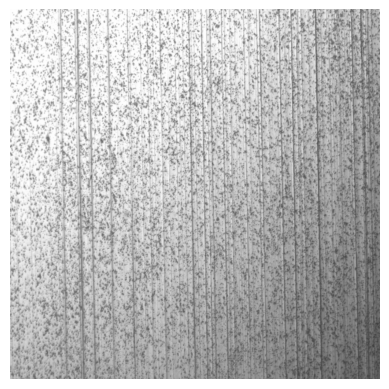

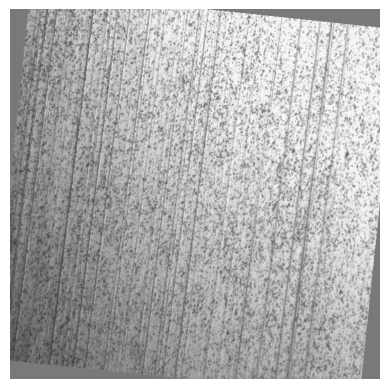

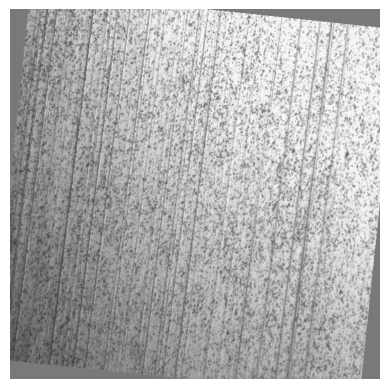

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.6051638..1.2148942].


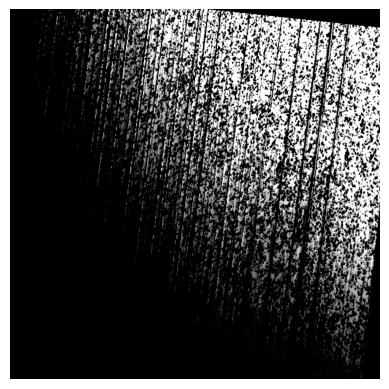

In [5]:

import torch
import torchvision.transforms as T
import random
import torch
import numpy as np
import torchvision.transforms as T
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from seed_main import SEED
import matplotlib.pyplot as plt

torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

class CustomDataset(Dataset):
    def __init__(
        self,
        images_dir: str,
        metadata_csv: str,
        filename_col: str = "image_id",
        label_col: str = "label",
        transform=None,
        augmentation_factor: int = 1  # New parameter
    ):
        self.images_dir = images_dir
        self.df = pd.read_csv(metadata_csv)
        self.filename_col = filename_col
        self.label_col = label_col
        self.transform = transform
        self.augmentation_factor = augmentation_factor

        if self.filename_col not in self.df.columns:
            raise KeyError(f"Column '{self.filename_col}' not in CSV")
        if self.label_col not in self.df.columns:
            raise KeyError(f"Column '{self.label_col}' not in CSV")

    def __len__(self):
        # The dataset length is multiplied by the augmentation factor
        return len(self.df) * self.augmentation_factor

    def __getitem__(self, idx):
        # Map idx back to the original image index
        base_idx = idx % len(self.df)
        row = self.df.iloc[base_idx]
        image_id = int(row[self.filename_col])
        class_label = int(row[self.label_col])
        img_path = os.path.join(self.images_dir, str(class_label), f"{image_id}.jpg")

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)  # Should be stochastic for augmentation
        return image, class_label


class CustomSingleImageTransform:
    def __init__(self, image_size=(640, 640), train=True, flip_prob=0.5, rotation_degrees=10, jitter_params=None):
        self.train = train
        self.resize = T.Resize(image_size)
        self.to_tensor = T.ToTensor()
        self.mean=[0.7329108720275311, 0.7329108720275311, 0.7329108720275311],
        self.std=[0.19402230922580405, 0.19402230922580405, 0.19402230922580405]
        self.normalize = T.Normalize(
            mean=[0.7329108720275311, 0.7329108720275311, 0.7329108720275311],
            std=[0.19402230922580405, 0.19402230922580405, 0.19402230922580405]
        )
        if jitter_params is None:
            jitter_params = dict(brightness=0.1, contrast=0.1, saturation=0, hue=0)
        self.color_jitter = T.ColorJitter(**jitter_params)
        self.flip_prob = flip_prob
        self.rotation_degrees = rotation_degrees

        if self.train:
            self.augment = T.Compose([
                T.RandomHorizontalFlip(p=self.flip_prob),
                T.RandomRotation(degrees=self.rotation_degrees, fill=(128,128,128)),
                self.color_jitter
            ])
        else:
            self.augment = T.Compose([])

    def __call__(self, img):
        img1 = self.resize(img.copy())
        if self.train:
            img2 = self.augment(img1.copy())
        img3 = self.to_tensor(img2)
        img4 = self.normalize(img3)
        return img1, img2, img3, img4
        
    def unnormalize(self, img_tensor):
        # img_tensor: (3, H, W), torch.Tensor
        img = img_tensor.clone().detach().cpu().numpy()
        img = img.transpose(1, 2, 0)  # (H, W, 3)
        mean = np.array(self.mean).reshape(1, 1, 3)
        std = np.array(self.std).reshape(1, 1, 3)
        img = (img * std) + mean
        img = np.clip(img, 0, 1)
        return img

# Define transforms
train_transform = CustomSingleImageTransform(train=True)

# Paths
train_images_dir = os.path.join(parent_dir / 'models/yolo_default_cls/dataset', 'train')

# Datasets
model_dataset = CustomDataset(
    images_dir=train_images_dir,
    metadata_csv=parent_dir / 'models/yolo_default_cls/dataset/train_metadata.csv',
    transform=None,
    augmentation_factor=1
)

img0 = model_dataset[0][0]
img1, img2, img3, img4 = train_transform(img0)

img3_np = img3.permute(1, 2, 0).cpu().numpy()
img3_uint8 = (img3_np * 255).astype('uint8')
img3_pil = Image.fromarray(img3_uint8)

#img3 = Image.fromarray(img3_np)
#img4_np = train_transform.unnormalize(img4)

#img4 = Image.fromarray(img4_np)

img4_np = img4.permute(1, 2, 0).cpu().numpy()
img4_uint8 = (img4_np * 1).astype('uint8')
img4_pil = Image.fromarray(img4_uint8)


#img4_uint8 = (img4_np * 255).astype('uint8')
#img4_pil = Image.fromarray(img4_uint8)
#display(img4_pil)


display(img0, img1, img2, img3_pil, img4_pil)

plt.imshow(img0)
plt.axis('off')
plt.show()


plt.imshow(img1)
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.axis('off')
plt.show()

plt.imshow(img3_np)
plt.axis('off')
plt.show()

plt.imshow(img4_np)
plt.axis('off')
plt.show()
